# Importing the Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings 
from sklearn.metrics import accuracy_score
import joblib 

# Loading Olympic Data Set

In [3]:
a=pd.read_csv(r"C:\Users\ASUS\Downloads\olympics_dataset.csv\olympics_dataset.csv")
a

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze


In [87]:
a["Year"].value_counts()

Year
2020    15121
2024    14892
2000    13821
1996    13780
2016    13688
2008    13602
2004    13443
1992    12977
2012    12920
1988    12037
1972    10304
1984     9454
1976     8641
1968     8588
1952     8270
1960     8119
1964     7702
1980     7191
1936     6506
1948     6405
1924     5233
1956     5127
1928     4992
1920     4292
1912     4040
1908     3101
1932     2969
1900     1936
1906     1733
1904     1301
1896      380
Name: count, dtype: int64

In [7]:
b=a[a["Medal"]=="Silver"]
b

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
37,86,Alf Aanning,M,Norway,NOR,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
42,92,Pepijn Aardewijn,M,Netherlands,NED,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
55,106,Karl Aas,M,Norway,NOR,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver
101,163,Mariya (-tarabina),F,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver
113,175,Luc Abalo,M,France,FRA,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver
...,...,...,...,...,...,...,...,...,...,...,...
252478,4669223,Loic Bade,M,France,FRA,2024,Summer,Paris,Football,Men,Silver
252530,4975921,Bhekempilo Eppie,M,Botswana,BOT,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Silver
252546,4979557,Isabella Whittaker,F,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver
252551,4979564,Quincy Wilson,M,United States,USA,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Silver


In [6]:
a=a[:50001]
a

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal
...,...,...,...,...,...,...,...,...,...,...,...
49996,59509,Cyril Dugmore,M,Great Britain,GBR,1908,Summer,London,Athletics,Athletics Men's Triple Jump,No medal
49997,59510,Damir Dugonji,M,Slovenia,SLO,2008,Summer,Beijing,Swimming,Swimming Men's 100 metres Breaststroke,No medal
49998,59511,Damir Dugonji,M,Slovenia,SLO,2012,Summer,London,Swimming,Swimming Men's 100 metres Breaststroke,No medal
49999,59512,Damir Dugonji,M,Slovenia,SLO,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Breaststroke,No medal


In [14]:
a['Team'].value_counts()

Team
United States                           3434
France                                  3396
Italy                                   2884
Great Britain                           2588
Australia                               1750
                                        ... 
Bronia                                     1
Trans-Mississippi Golf Association-2       1
Denmark-1                                  1
Gilliatt V                                 1
Trintel II                                 1
Name: count, Length: 740, dtype: int64

In [16]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   player_id  50001 non-null  int64 
 1   Name       50001 non-null  object
 2   Sex        50001 non-null  object
 3   Team       50001 non-null  object
 4   NOC        50001 non-null  object
 5   Year       50001 non-null  int64 
 6   Season     50001 non-null  object
 7   City       50001 non-null  object
 8   Sport      50001 non-null  object
 9   Event      50001 non-null  object
 10  Medal      50001 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.2+ MB


In [18]:
a.describe(include="all")

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
count,50001.000000,50001,50001,50001,50001,50001.000000,50001,50001,50001,50001,50001
unique,NaN,26249,2,740,223,NaN,1,23,50,624,4
top,NaN,Gustaf Carlberg,M,United States,FRA,NaN,Summer,London,Athletics,Football Men's Football,No medal
freq,NaN,49,37412,3434,3602,NaN,50001,5158,9121,1463,42839
mean,29780.819324,NaN,NaN,NaN,NaN,1976.039679,NaN,NaN,NaN,NaN,NaN
std,17252.518070,NaN,NaN,NaN,NaN,31.090374,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,14695.000000,NaN,NaN,NaN,NaN,1956.000000,NaN,NaN,NaN,NaN,NaN
50%,30041.000000,NaN,NaN,NaN,NaN,1984.000000,NaN,NaN,NaN,NaN,NaN
75%,44750.000000,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN


In [20]:
a["Medal"].value_counts()

Medal
No medal    42839
Gold         2418
Bronze       2386
Silver       2358
Name: count, dtype: int64

In [19]:
# check for missing values
a.isna().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

# LabelEncoder

In [8]:
l1=LabelEncoder()
l2=LabelEncoder()
l3=LabelEncoder()
l4=LabelEncoder()
l5=LabelEncoder()
l6=LabelEncoder()
l7=LabelEncoder()
 


In [10]:
warnings.filterwarnings("ignore")

In [12]:
a["Event"]=l1.fit_transform(a["Event"])

In [14]:
a["Medal"]=l2.fit_transform(a["Medal"])

In [16]:
a["Sex"]=l3.fit_transform(a["Sex"])

In [18]:
a["Team"]=l4.fit_transform(a["Team"])

In [20]:
a["NOC"]=l5.fit_transform(a["NOC"])

In [22]:
a["Season"]=l6.fit_transform(a["Season"])

In [24]:
a["Sport"]=l7.fit_transform(a["Sport"])

 # saving 

In [26]:
joblib.dump(l1,'l1')

['l1']

In [28]:
joblib.dump(l2,'l2')

['l2']

In [30]:
joblib.dump(l3,'l3')

['l3']

In [32]:
joblib.dump(l4,'l4')

['l4']

In [34]:
joblib.dump(l5,'l5')

['l5']

In [36]:
joblib.dump(l6,'l6')

['l6']

In [38]:
joblib.dump(l7,'l7')

['l7']

In [40]:
a.drop(columns=['Name','City',"Season"],inplace=True)

In [60]:
a.head()

,player_id,Sex,Team,NOC,Year,Sport,Event,Medal
0,0,1,135,41,1992,5,138,2
1,1,1,135,41,2012,24,314,2
2,2,1,190,55,1920,17,278,2
3,3,1,193,55,1900,45,571,1
4,26,0,444,143,1932,2,108,2


In [60]:
a.tail()

,player_id,Sex,Team,NOC,Year,Sport,Event,Medal
49996,59509,1,271,74,1908,2,104,2
49997,59510,1,589,178,2008,38,493,2
49998,59511,1,589,178,2012,38,493,2
49999,59512,1,589,178,2016,38,493,2
50000,59513,0,116,36,2008,49,623,2


# Histogram plot

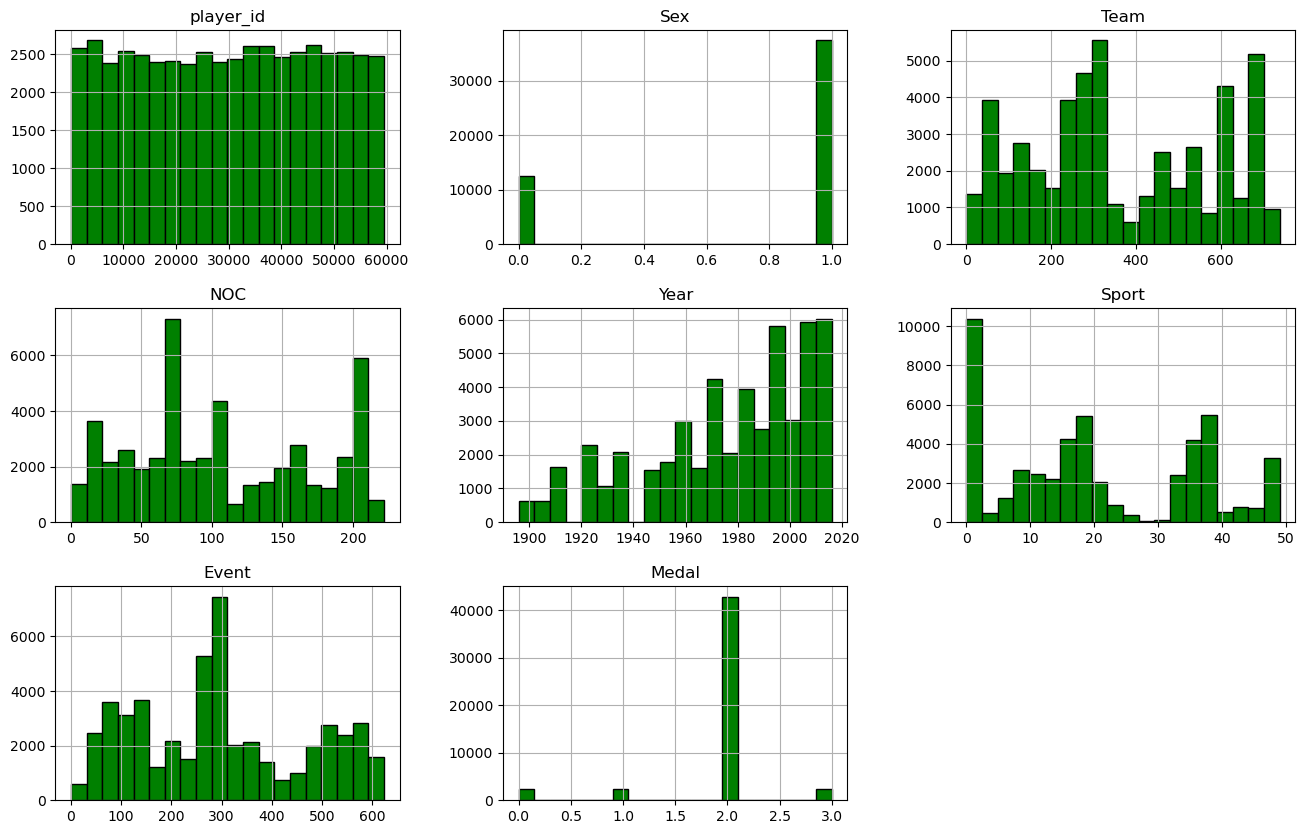

In [89]:
a.hist(figsize=(16, 10), bins=20, color='g', edgecolor='black')
plt.savefig('histogram_plot.png') 
plt.show()

# Checking for Outlier

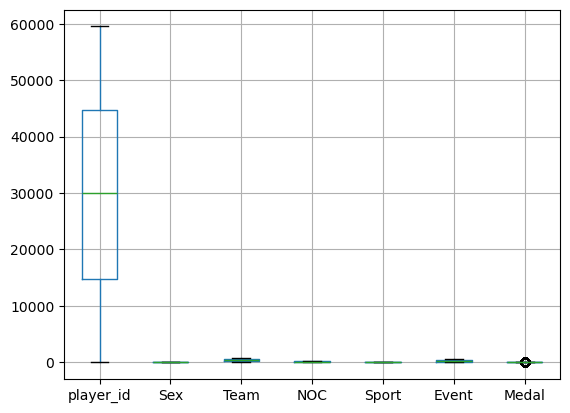

In [62]:
a.boxplot()
plt.show()

# HeatMap

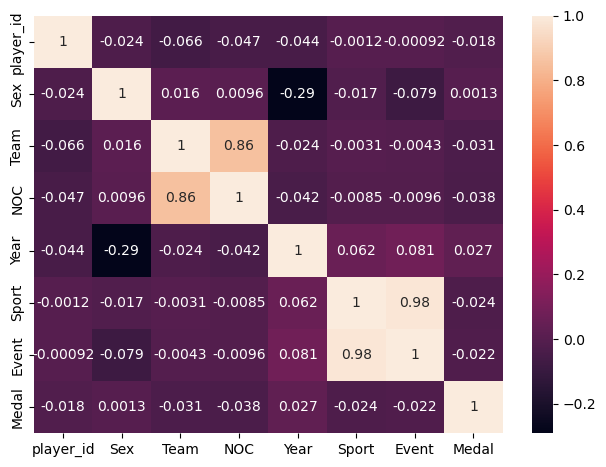

In [146]:
 
sns.heatmap(a.corr(),annot=True)
plt.tight_layout()
plt.show()

In [62]:
x1=a.drop('Medal',axis=1)
y1=a[['Medal']]

In [64]:
warnings.filterwarnings("ignore")

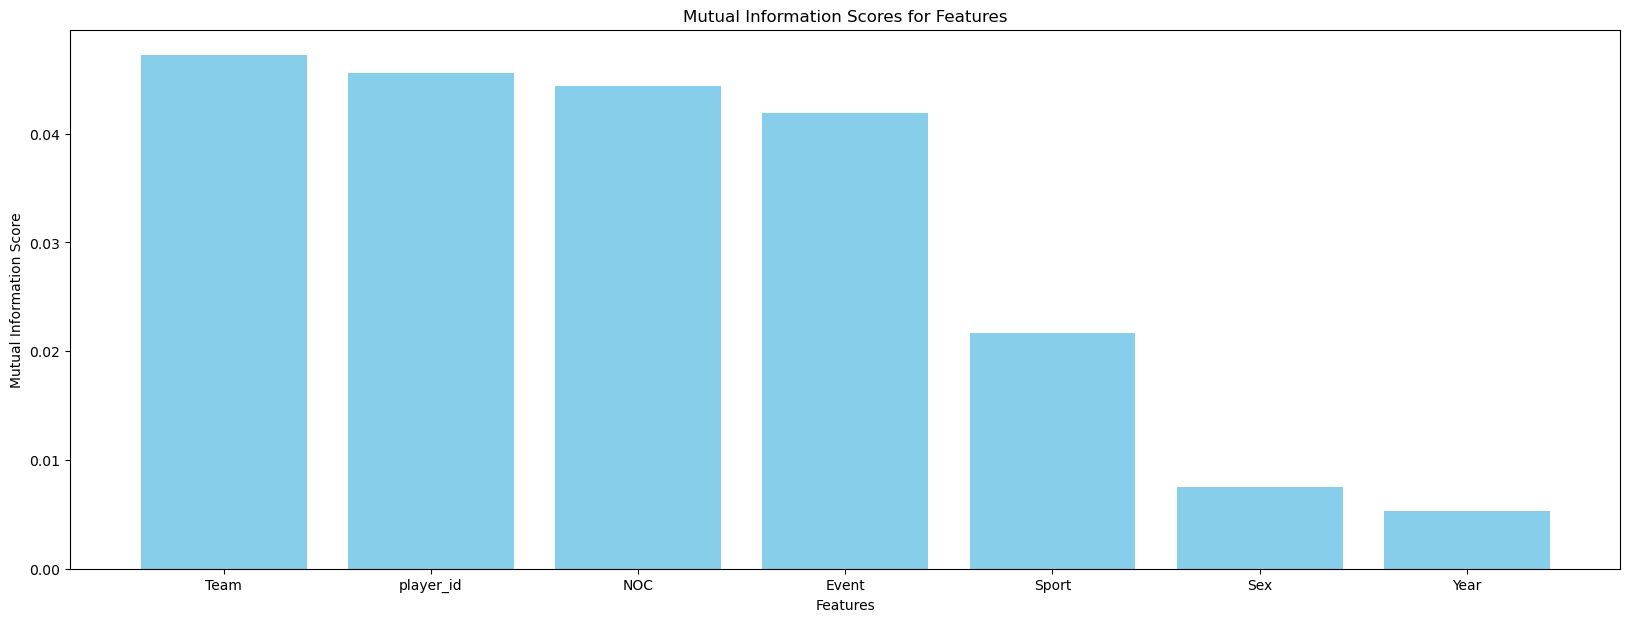

In [55]:
# Calculate mutual information
mi_scores = mutual_info_classif(x1, y1, random_state=42)
mi_df = pd.DataFrame({'Feature': x1.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
plt.figure(figsize=(20,7))
plt.bar(mi_df['Feature'], mi_df['Mutual Information'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features')
plt.show()

# Drop Column

In [66]:
a.drop(["Year"], axis=1, inplace=True)



In [56]:
a

,player_id,Sex,Team,NOC,Sport,Event,Medal
0,0,1,135,41,5,138,2
1,1,1,135,41,24,314,2
2,2,1,190,55,17,278,2
3,3,1,193,55,45,571,1
4,26,0,444,143,2,108,2
...,...,...,...,...,...,...,...
49996,59509,1,271,74,2,104,2
49997,59510,1,589,178,38,493,2
49998,59511,1,589,178,38,493,2
49999,59512,1,589,178,38,493,2


In [68]:
y=a[["Medal"]]

In [70]:
x=a.drop("Medal",axis=1)

In [72]:
x

,player_id,Sex,Team,NOC,Sport,Event
0,0,1,135,41,5,138
1,1,1,135,41,24,314
2,2,1,190,55,17,278
3,3,1,193,55,45,571
4,26,0,444,143,2,108
...,...,...,...,...,...,...
49996,59509,1,271,74,2,104
49997,59510,1,589,178,38,493
49998,59511,1,589,178,38,493
49999,59512,1,589,178,38,493


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [64]:
y.value_counts()

Medal
2        42839
1         2418
0         2386
3         2358
Name: count, dtype: int64

In [174]:
class_counts=y_train.value_counts()
class_counts

Medal
2        34268
1         1925
0         1910
3         1897
Name: count, dtype: int64

In [178]:
warnings.filterwarnings("ignore")

In [66]:
log_model=LogisticRegression()  
log_model.fit(x_train,y_train)

LogisticRegression()

In [68]:
# Making predictions on the test set
test_pred = log_model.predict(x_test)
test_pred


array([2, 2, 2, ..., 2, 2, 2])

In [70]:
# Making predictions on the training set
train_pred = log_model.predict(x_train)
train_pred


array([2, 2, 2, ..., 2, 2, 2])

In [72]:
accuracy_score(test_pred,y_test)

0.857014298570143

In [74]:
accuracy_score(train_pred,y_train)

0.8567

# Decision Tree Classifier

In [196]:
from sklearn.model_selection import GridSearchCV #control the structure of the decision tree and influence how it learns from the data.improve the model's performance
from sklearn.tree import DecisionTreeClassifier

# Define the model
model = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'], # Specifies the function to measure the quality of a split.
    'max_depth': [3, 5, 10, None], # Limits the depth of the tree and prevents overfitting by controlling the tree's complexity.
    'min_samples_split': [ 5, 10], # Minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be in a leaf node.
    'max_features': [None, 'sqrt', 'log2'] # Number of features to consider when looking for the best split.
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [5, 10]},
             scoring='accuracy')

In [198]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}


In [200]:
# Evaluate the best model
best_model = grid_search.best_estimator_
print("Test Accuracy:", best_model.score(x_test, y_test))

Test Accuracy: 0.8599140085991401


In [202]:
DTC_model=DecisionTreeClassifier(criterion="gini",max_depth= 10, max_features= "log2", min_samples_leaf= 4, min_samples_split= 10)
DTC_model.fit(x_train,y_train) #best model

DecisionTreeClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       min_samples_split=10)

In [204]:
test_pred=DTC_model.predict(x_test)
train_pred=DTC_model.predict(x_train)

In [206]:
accuracy_score(train_pred,y_train)

0.866475

In [208]:
accuracy_score(test_pred,y_test)

0.8607139286071392

In [210]:
import joblib

# Example: Save a trained model
joblib.dump(DTC_model, "model.joblib")

# Load the model
loaded_model = joblib.load("model.joblib")

# KNieghborsClassifier

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_best_score = grid_search.best_score_

# Evaluate on the test set
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", best_params)
print("Cross-Validated Best Score:", cv_best_score)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Cross-Validated Best Score: 0.8491250000000001
Test Accuracy: 0.847015298470153


# SVM

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the model
svm = SVC()

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_best_score = grid_search.best_score_

# Evaluate on the test set
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output results
print("Best Parameters:", best_params)
print("Cross-Validated Best Score:", cv_best_score)
print("Test Accuracy:", test_accuracy)


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Cross-Validated Best Score: 0.8567
Test Accuracy: 0.857014298570143


In [440]:
pip install xgboost



   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 259.2 kB/s eta 0:08:02
   ---------------------------------------- 0.0/124.9 MB 279.3 kB/s eta 0:07:28
   ---------------------------------------- 0.1/124.9 MB 476.3 kB/s eta 0:04:23
   ---------------------------------------- 0.2/124.9 MB 1.1 MB/s eta 0:01:56
   ---------------------------------------- 0.5/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 1.0/124.9 MB 3.2 MB/s eta 0:00:39
   ---------------------------------------- 1.2/124.9 MB 3.2 MB/s eta 0:00:39
    --------------------------------------- 1.9/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 2.8/124.9 MB 6.2 MB/s eta 0:00:20
    --------------------------------------- 2.9/124.9 MB 6.3 MB/s eta 0:00:20


In [442]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Define the models and their hyperparameters
models_params = {
    'Naive Bayes': (
        GaussianNB(),
        {
            'var_smoothing': [1e-9, 1e-8, 1e-7]
        }
    ),
    'XGBoost': (
        XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0]
        }
    )
}

# Evaluate Naive Bayes
nb_model, nb_params = models_params['Naive Bayes']
nb_grid_search = GridSearchCV(estimator=nb_model, param_grid=nb_params, scoring='accuracy', cv=5, n_jobs=-1)
nb_grid_search.fit(x_train, y_train)
nb_best_model = nb_grid_search.best_estimator_
nb_best_params = nb_grid_search.best_params_
nb_cv_best_score = nb_grid_search.best_score_

# Evaluate Naive Bayes on test set
nb_y_pred = nb_best_model.predict(x_test)
nb_test_accuracy = accuracy_score(y_test, nb_y_pred)

# Output Naive Bayes results
print("Naive Bayes Best Parameters:", nb_best_params)
print("Naive Bayes Cross-Validated Best Score:", nb_cv_best_score)
print("Naive Bayes Test Accuracy:", nb_test_accuracy)

# Evaluate XGBoost
xgb_model, xgb_params = models_params['XGBoost']
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, scoring='accuracy', cv=5, n_jobs=-1)
xgb_grid_search.fit(x_train, y_train)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_best_params = xgb_grid_search.best_params_
xgb_cv_best_score = xgb_grid_search.best_score_

# Evaluate XGBoost on test set
xgb_y_pred = xgb_best_model.predict(x_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_y_pred)

# Output XGBoost results
print("XGBoost Best Parameters:", xgb_best_params)
print("XGBoost Cross-Validated Best Score:", xgb_cv_best_score)
print("XGBoost Test Accuracy:", xgb_test_accuracy)


Naive Bayes Best Parameters: {'var_smoothing': 1e-09}
Naive Bayes Cross-Validated Best Score: 0.8567
Naive Bayes Test Accuracy: 0.857014298570143
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Cross-Validated Best Score: 0.86295
XGBoost Test Accuracy: 0.8660133986601339


In [76]:
from xgboost import XGBClassifier

model=XGBClassifier(learning_rate= 0.1, max_depth =7, n_estimators= 200, subsample= 0.8)
model.fit(x_train,y_train) #best model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [78]:
y_pred=model.predict(x_test)

In [68]:
import joblib

joblib.dump(model, 'xgboost_best_model.pkl')

['xgboost_best_model.pkl']

In [6]:
import joblib

loaded_xgb_model = joblib.load('xgboost_best_model.pkl')

In [23]:
loaded_xgb_model.predict([[0, 1, 135, 41, 5, 138]])



array([2], dtype=int64)

In [72]:
loaded_xgb_model.predict([[3,1,193,55,45,571]])

array([1], dtype=int64)